# Evaluating the Salience of Custom Categories in Concept Discussion
Empath is a tool for analyzing text across lexical categories. It has a set of pre-defined categories obtained through machine learning and crowdsourced verification, and it uses cosine distance metrics to assign category weights to any given corpus of text. Here we use it to view the distribution of categories between the free and D-C groups.

In [2]:
from empath import Empath
import re

# Locations of input files. These files have been anonymized, and the files themselves will not be available
# in this folder, to preserve the privacy of the teams.
textPathFree = "../../../private/brainstorming_viz_data/free_group/"
textPathDC = "../../../private/brainstorming_viz_data/d-c_group/"

# Teamwise transcript (of divergent processes) of the "Free Brainstorming" group
fileNamesFreeDivergent = ['teamA_part1_divergent.txt', 'teamB_part1_divergent.txt', 'teamC_part1_divergent.txt',
                          'teamD_part1_divergent.txt', 'teamE_part1_divergent.txt', 'teamF_part1_divergent.txt',
                          'teamG_part1_divergent.txt', 'teamH_part1_divergent.txt', 'teamI_part1_divergent.txt']

# Teamwise transcript (of divergent processes) of the "Divergent-Convergent (D-C) Brainstorming" group
fileNamesDCDivergent = ['teamJ_part1_divergent.txt', 'teamJ_part3_divergent.txt', 'teamK_part1_divergent.txt',
                        'teamK_part3_divergent.txt', 'teamL_part1_divergent.txt', 'teamL_part3_divergent.txt', 
                        'teamM_part1_divergent.txt', 'teamM_part2_3_convergent_divergent.txt', 'teamN_part1_divergent.txt',
                        'teamN_part3_divergent.txt', 'teamO_part1_divergent.txt', 'teamO_part2_3_conv_div.txt',
                        'teamP_part1_divergent.txt', 'teamP_part3_divergent.txt', 'teamQ_part1_divergent.txt',
                        'teamQ_part3_4_div_conv.txt', 'teamR_part1_divergent.txt', 'teamR_part3_divergent.txt'] 

# Teamwise transcript (of divergent processes) of the "Free Brainstorming" group
fileNamesFreeConvergent = ['teamA_part2_convergent.txt', 'teamB_part2_convergent.txt', 'teamC_part2_convergent.txt',
                           'teamD_part2_convergent.txt', 'teamE_part2_convergent.txt', 'teamF_part2_convergent.txt',
                           'teamG_part2_convergent.txt', 'teamH_part2_convergent.txt', 'teamI_part2_convergent.txt']

# Teamwise transcript (of divergent processes) of the "Divergent-Convergent (D-C) Brainstorming" group
fileNamesDCConvergent = ['teamJ_part2_convergent.txt', 'teamJ_part4_convergent.txt', 'teamK_part2_convergent.txt',
                         'teamK_part4_convergent.txt', 'teamL_part2_convergent.txt', 'teamL_part4_convergent.txt',
                         'teamM_part4_convergent.txt', 'teamN_part2_convergent.txt', 'teamN_part4_convergent.txt',
                         'teamO_part4_convergent.txt', 'teamP_part2_convergent.txt', 'teamP_part4_convergent.txt',
                         'teamQ_part2_convergent.txt', 'teamR_part2_convergent.txt', 'teamR_part4_convergent.txt']  

def openFiles(fileNamesList, filePath):
    # Given a list of file names and a path for the files, returns a
    # list of file objects
    fObjList = []
    for fileName in fileNamesList:
        fObj = open(filePath + fileName, 'r', encoding='utf8')
        fObjList.append(fObj)
    return fObjList

# Some of these files have non-UTF characters that may need to be removed.
def removeSpecials(filesList):
    # Remove some incompatible unicode characters such as distinct
    # opening and closing quotes, ellipsis etc.
    # Also finally converts all text to lowercase
    outString = ''
    for inFile in filesList:
        # print("reading file",inFile.name.split("/")[-1], "...", end="")
        temp = inFile.read()
        subsFileQuotes = re.sub(u"(\u2018|\u2019)", "'", temp)
        subsFileDQuotes = re.sub(u'(\u201c|\u201d)', '"', subsFileQuotes)
        subsFileEllipsis = re.sub(u"\u2026", "...", subsFileDQuotes)
        outString += subsFileEllipsis
        # print("done.")
    return outString.lower()

# These files have the transcriber's observations like [laughter], [silent], [cross-talk] etc.
# These may throw off the text analysis, so we remove them. These are typically within parantheses,
# so we can remove everything between these parantheses.

def removeObservations(test_str) :
    # removes all text within parantheses
    # these are usually observations by the transcriber
    # and thus should not be considered in content analysis
    # code from http://stackoverflow.com/questions/14596884/remove-text-between-and-in-python
    ret = ''
    skip1c = 0
    skip2c = 0
    squareparen = 0
    for i in test_str:
        if i == '[':
            skip1c += 1
            squareparen += 1
        elif i == '(':
            skip2c += 1
        elif i == ']' and skip1c > 0:
            skip1c -= 1
        elif i == ')'and skip2c > 0:
            skip2c -= 1
        elif skip1c == 0 and skip2c == 0:
            ret += i
    return ret

In [33]:
%pylab inline
# pylab.rcParams['figure.figsize'] = (16, 15)
matplotlib.rcParams.update({'font.size': 22})
from matplotlib import pyplot as plt
import numpy as np

lexicon = Empath()

toy_type_keywords = ["game", "game", "toys", "train", "underwater", "boat", "wind", "cars", "car", "trains", "desk", "toy",
                     "kid", "kid", "kids", "kids", "kids", "kids", "toy", "game", "toy", "water", "water", "ship", "train",
                     "tank", "pac man", "boat", "car", "car", "toy", "tank", "bicycle", "catapult", "hovercraft", "elephant",
                     "water", "catapult", "robot"]

toy_components_keywords = ["frog", "trunk", "arms", "motor", "wheels", "balls", "spring", "ball", "features", "peanut", "suit",
                           "box", "car", "wheel", "control", "control", "ball", "pinball", "rocket", "part", "part", "wheels",
                           "gun", "marble", "ground", "box", "board", "spring", "air", "air", "rubber", "fish", "wing", "arm",
                           "wheel", "wheels", "spring", "ball", "head", "part", "wings", "hand", "wind", "launcher", "button",
                           "box", "frisbee", "ball", "legs", "mouse", "laser", "fish", "remote control", "wheels", "frog",
                           "board", "magnets", "wings", "balls", "fan", "fan", "machine"]

toy_attributes_keywords = ["top", "inside", "alright", "back", "well", "end", "enough", "many", "water", "hard", "fun", "type",
                           "different", "different", "trivial", "little", "high", "awesome", "cool", "big", "bad", "bad",
                           "mechanical", "lot", "new", "top", "top", "inside", "inside", "side", "side", "lot", "whole",
                           "small", "back", "front", "easy", "inside", "least", "much", "best", "long", "little", "big",
                           "different", "first", "whole", "cool", "enough", "random", "complicated", "bad", "simple", "awesome",
                           "light", "forward", "bit", "front", "side", "back", "hard", "many", "orange", "top", "lot",
                           "difficult", "wait", "take", "push", "flying", "add", "build", "change", "fly", "turn", "hit",
                           "moves", "try", "said", "shoots", "play", "say", "throw", "feel", "come", "going", "motion", "shoot",
                           "trying", "get", "guess", "high", "cool", "whole", "awesome", "little", "lot", "much", "true", "hard",
                           "nice", "nontrivial", "big", "complex", "back", "far", "awesome", "different", "little", "real",
                           "much", "best", "bottom", "big", "hard", "cool", "fine", "first", "nice", "better", "fun"]

action_keywords = ["come", "write", "combine", "got", "give", "going", "move", "select", "going", "get", "move", "come", "got",
                   "got", "let", "add", "change", "shoots", "made", "made", "remember", "try", "fly", "feel", "said", "set",
                   "pull", "comes", "hafta", "let", "put", "need", "done", "done", "roll", "motion", "want", "goes", "looks",
                   "play", "seen", "build", "spin", "start", "coming", "open", "turn", "spinning", "bounce", "give", "hold",
                   "look", "look", "see", "look", "looks", "push", "wait", "jump", "battle", "see", "shoot", "hit", "use", "see",
                   "spin", "use", "feel", "moves", "going", "want", "put", "making", "move", "need", "take", "look", "shoots",
                   "bounce", "let", "motion", "call", "start", "shoot", "turn", "comes", "jousting", "move", "throw", "trying",
                   "coming", "write", "write", "come", "show", "add", "said", "goes", "done", "want", "see", "goes", "use",
                   "looks", "need", "put", "start", "move", "call", "land", "wait", "let", "work", "use", "play", "motion",
                   "made", "done", "explode", "said", "turn", "find", "pick", "start", "sort", "feel", "get", "pull", "jumping",
                   "put", "add", "trying", "jump", "want", "take", "need", "say", "hopping", "goes", "shoot", "gets"]

design_process_keywords = ["thinking", "trying", "say", "talking", "talking", "saying", "saying", "saying", "saying", 
                           "idea", "idea", "figure", "time", "ideas", "draw", "drawing", "thought", "concept", "paper", 
                           "design", "work", "final concept", "profile", "two point", "draw", "team", "ideas", "thinking",
                           "minutes", "time", "vote", "perspective", "design", "view", "idea", "work", "drawing",
                           "minutes", "work", "concept", "idea", "ideas", "candy", "drawing", "draw", "point", "design",
                           "time", "pencil", "line", "minutes", "sheets", "final", "concept", "concepts", "ideas", "selected",
                           "draw", "thinking", "point", "perspective", "sketch", "design", "drawing"]

toy_type_keywords = list(set(toy_type_keywords))
toy_components_keywords = list(set(toy_components_keywords))
toy_attributes_keywords = list(set(toy_attributes_keywords))
action_keywords = list(set(action_keywords))
design_process_keywords = list(set(design_process_keywords))

list_size = max([
        len(toy_type_keywords),
        len(toy_components_keywords),
        len(toy_attributes_keywords),
        len(action_keywords),
        len(design_process_keywords)
    ])

"""
print("TOY COMPONENTS:")
toy_components = lexicon.create_category("toy components", toy_components_keywords, model="reddit")
print(" ")
print("TOY ATTRIBUTES:")
toy_attributes = lexicon.create_category("toy attributes", toy_attributes_keywords, model="fiction")
print(" ")
print("TOY ACTION:")
toy_action = lexicon.create_category("toy action", action_keywords, model="nytimes")
# toy_action = lexicon.create_category("toy action", action_keywords, model="fiction", size=len(action_keywords))
print(" ")
print("DESIGN PROCESS:")
design_process = lexicon.create_category("design process", design_process_keywords, model="fiction")
"""
print("TOY TYPES:")
toy_types = lexicon.create_category("toy_types", toy_type_keywords, model="reddit")
print(" ")

cats_to_show = ["toy_types", "toy components", "toy attributes", "toy action", "design process"]

def plot_top_cats(categories_dict, num_categories):
    cat_names = []
    cat_vals = []
    for ind, w in enumerate(sorted(categories_dict, key=categories_dict.get)):
        if not categories_dict[w] == 0:
            cat_names.append(w)
            cat_vals.append(categories_dict[w])
    cat_names = cat_names[-num_categories:]
    cat_vals = cat_vals[-num_categories:]
    pylab.rcParams['figure.figsize'] = (16, round(num_categories/3))
    yTicks = np.arange(len(cat_names))
    # yTicks_grp1 = [x+0.2 for x in yTicks]
    ax = plt.subplot(111)
    ax.barh(yTicks, cat_vals, height=0.5, color='#a6cee3', align='center', lw=0)
    ax.set_yticks(yTicks)
    ax.set_yticklabels(cat_names)
    ax.set_ylim([-1, len(cat_names)])
    plt.show()
    

def compare_cats(cat_dict1, cat_name1, cat_dict2, cat_name2, cat_list):
    combined_weights = {}
    for key in cat_dict1:
        combined_weights[key] = cat_dict1[key] + cat_dict2[key]
    num_categories = len(cat_list)
    cat_names = []
    cat1_vals = []
    cat2_vals = []
    for ind, w in enumerate(sorted(combined_weights, key=combined_weights.get)):
        if not (cat_dict1[w] == 0 and cat_dict2[w] == 0):
            cat_names.append(w)
            cat1_vals.append(cat_dict1[w])
            cat2_vals.append(cat_dict2[w])
    cat_names = cat_names[-num_categories:]
    cat1_vals = cat1_vals[-num_categories:]
    cat2_vals = cat2_vals[-num_categories:]
    pylab.rcParams['figure.figsize'] = (16, round(num_categories))
    yTicks = np.arange(len(cat_names))
    yTicks_cat1 = [x+0.2 for x in yTicks]
    yTicks_cat2 = [x-0.2 for x in yTicks]
    ax = plt.subplot(111)
    ax.barh(yTicks_cat1, cat1_vals, height=0.38, color='#a6cee3', align='center', lw=0)
    ax.barh(yTicks_cat2, cat2_vals, height=0.38, color='#fdb462', align='center', lw=0)
    ax.set_yticks(yTicks)
    ax.set_yticklabels(cat_names)
    ax.set_ylim([-1, len(cat_names)+2])
    legend([cat_name1, cat_name2], loc=9)
    plt.show()


def compare_cats_general(cat_dict_list, cat_name_list, cat_list, filename, sort_option):
    combined_weights = {}
    for key in cat_dict_list[0]:
        combined_weights[key] = sum([cat_dict[key] for cat_dict in cat_dict_list])
    num_categories = len(cat_list)
    cat_names = []
    cat_vals_list = [ [] for cat_dict in cat_dict_list]
    if (sort_option):
        loop_list = enumerate(sorted(combined_weights, key=combined_weights.get))
    else :
        loop_list = enumerate(cat_list)
    for ind, w in loop_list:
        # are_vals_zero = True
        # for cat_dict in cat_dict_list:
        #     are_vals_zero = are_vals_zero and cat_dict[w] == 0
        # if not (are_vals_zero):
        cat_names.append(w)
        for ind, cat_vals in enumerate(cat_vals_list):
            cat_vals.append(cat_dict_list[ind][w])
    # cat_names = cat_names[-num_categories:]
    # for cat_vals in cat_vals_list:
    #     cat_vals = cat_vals[-num_categories:]
    pylab.rcParams['figure.figsize'] = (16, round(num_categories*1.2))
    yTicks = np.arange(len(cat_names))
    yTicks_cat_list = []
    tick_step_limit = (len(cat_dict_list) - 1)/2
    incSteps = numpy.arange(-tick_step_limit, tick_step_limit+1, 1)
    bar_height = (incSteps[1] - incSteps[0])/4
    for incStep in incSteps:
        yTicks_cat = [x - (incStep)*0.3 for x in yTicks]
        yTicks_cat_list.append(yTicks_cat)
    ax = plt.subplot(111)
    colorsList = ["#a6cee3","#fdb462","#ffe67a","#8da0cb","#e78ac3","#a6d854","#e5c494","#b3b3b3"]
    for ind, cat_vals in enumerate(cat_vals_list):
        ax.barh(yTicks_cat_list[ind], cat_vals, height=bar_height, color = colorsList[ind], align='center', lw=0)
    # ax.set_xticks([0.002, 0.004, 0.006, 0.008])
    ax.set_yticks(yTicks)
    ax.set_yticklabels(cat_names)
    ax.set_ylim([-0.5, len(cat_names)-0.5])
    # ax.set_xlim([0.0, 0.009])
    axis_font = {'size':'28'}
    ax.set_xlabel("Normalized Weight of Category in Text", **axis_font)
    ax.set_ylabel("Categories", **axis_font)
    legend(cat_name_list, loc=4, fontsize=22)
    plt.savefig(filename+".png", dpi=300)
    plt.show()


Populating the interactive namespace from numpy and matplotlib
TOY TYPES:
["hot_air_balloon", "helicopter", "crane", "airplane", "truck", "lawnmower", "hovercraft", "boat", "tractor", "snowmobile", "jetski", "speedboat", "horse", "pickup_truck", "fire_hydrant", "boats", "motorcycle", "water_slide", "jet", "golf_cart", "semi_trailer", "bulldozer", "tricycle", "jeep", "skateboard", "pole", "canoe", "raft", "chopper", "locomotive", "lawn_mower", "forklift", "plane", "surfboard", "jet_ski", "blimp", "small_boat", "cabin", "car", "swimming_pool", "moped", "camper", "bicycle", "RV", "motorbike", "truck_bed", "sled", "RC_car", "jet_skis", "trike", "glider", "dune_buggy", "garbage_truck", "submarine", "moving_car", "go-cart", "SUV.", "hummer", "train", "moving_vehicle", "contraption", "jumbo_jet", "scooter", "frozen_lake", "caboose", "dump_truck", "firetruck", "dingy", "scuba_gear", "motor_cycle", "little_boat", "car_roof", "parachute", "tow", "school_bus", "ferris_wheel", "mud_puddle", "concr

In [34]:
filesListFreeDiv = openFiles(fileNamesFreeDivergent, textPathFree)
filesListDCDiv = openFiles(fileNamesDCDivergent, textPathDC)

group1_raw_div = removeSpecials(filesListFreeDiv)
group2_raw_div = removeSpecials(filesListDCDiv)

group1_div = removeObservations(group1_raw_div)
group2_div = removeObservations(group2_raw_div)

group1_div_categories = lexicon.analyze(group1_div, categories = cats_to_show, normalize=True)
group2_div_categories = lexicon.analyze(group2_div, categories = cats_to_show, normalize=True)

filesListFreeConv = openFiles(fileNamesFreeConvergent, textPathFree)
filesListDCConv = openFiles(fileNamesDCConvergent, textPathDC)

group1_raw_conv = removeSpecials(filesListFreeConv)
group2_raw_conv = removeSpecials(filesListDCConv)

group1_conv = removeObservations(group1_raw_conv)
group2_conv = removeObservations(group2_raw_conv)

group1_conv_categories = lexicon.analyze(group1_conv, categories = cats_to_show, normalize=True)
group2_conv_categories = lexicon.analyze(group2_conv, categories = cats_to_show, normalize=True)

### Compare category distribution for divergent processes between free and d-c group

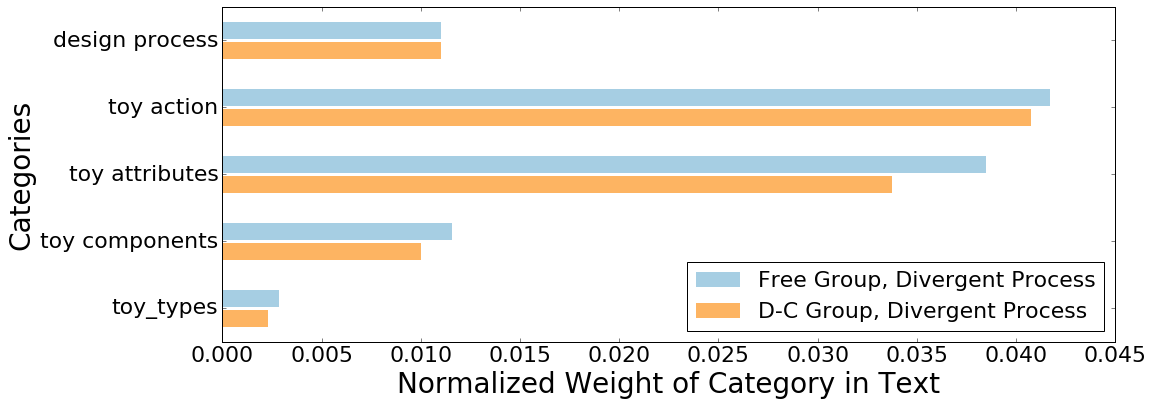

In [35]:
# compare_cats(group1_div_categories, "Free Group, Divergent Process", 
#             group2_div_categories, "D-C Group, Divergent Process", cats_to_show)
compare_cats_general([group1_div_categories, group2_div_categories], 
                     ["Free Group, Divergent Process", "D-C Group, Divergent Process"], 
                     cats_to_show, "divergent_processes", False)

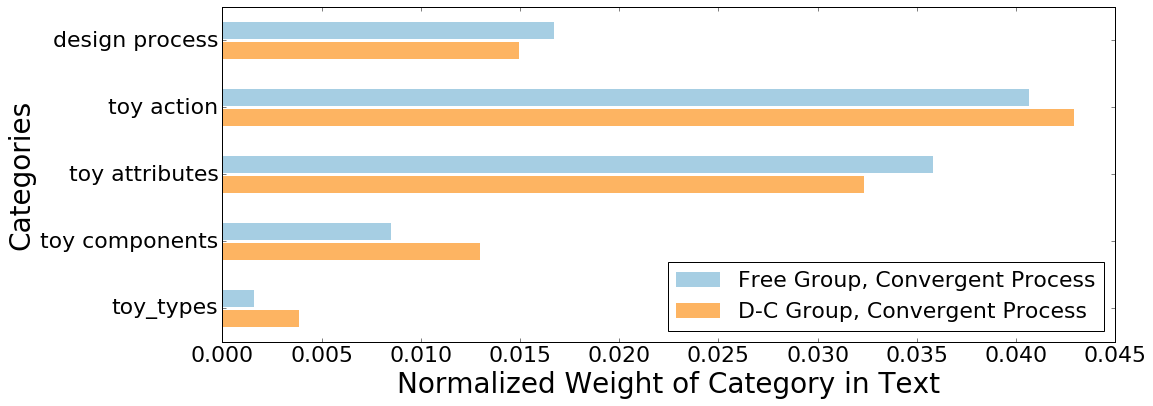

In [36]:
# compare_cats(group1_conv_categories, "Free Group, Convergent Process", 
#             group2_conv_categories, "D-C Group, Convergent Process", cats_to_show)


compare_cats_general([group1_conv_categories, group2_conv_categories],
                     ["Free Group, Convergent Process", "D-C Group, Convergent Process"],
                     cats_to_show, "convergent_processes", False)

In [37]:
# Separating Different Stages of the Divergent and Convergent Process 
fileNamesDCDivergentStage1 = ['teamJ_part1_divergent.txt', 'teamK_part1_divergent.txt', 'teamL_part1_divergent.txt',
                              'teamM_part1_divergent.txt', 'teamN_part1_divergent.txt', 'teamO_part1_divergent.txt',
                              'teamP_part1_divergent.txt', 'teamQ_part1_divergent.txt', 'teamR_part1_divergent.txt']

fileNamesDCDivergentStage2 = ['teamJ_part3_divergent.txt', 'teamK_part3_divergent.txt', 'teamL_part3_divergent.txt', 
                              'teamM_part2_3_convergent_divergent.txt', 'teamN_part3_divergent.txt', 'teamO_part2_3_conv_div.txt',
                              'teamP_part3_divergent.txt', 'teamQ_part3_4_div_conv.txt', 'teamR_part3_divergent.txt']

fileNamesDCConvergentStage1 = ['teamJ_part2_convergent.txt', 'teamK_part2_convergent.txt', 'teamL_part2_convergent.txt',
                               'teamN_part2_convergent.txt', 'teamP_part2_convergent.txt', 'teamQ_part2_convergent.txt',
                               'teamR_part2_convergent.txt'] 

fileNamesDCConvergentStage2 = ['teamJ_part4_convergent.txt', 'teamK_part4_convergent.txt', 'teamL_part4_convergent.txt',
                               'teamM_part4_convergent.txt', 'teamN_part4_convergent.txt', 'teamO_part4_convergent.txt',
                               'teamP_part4_convergent.txt', 'teamR_part4_convergent.txt']


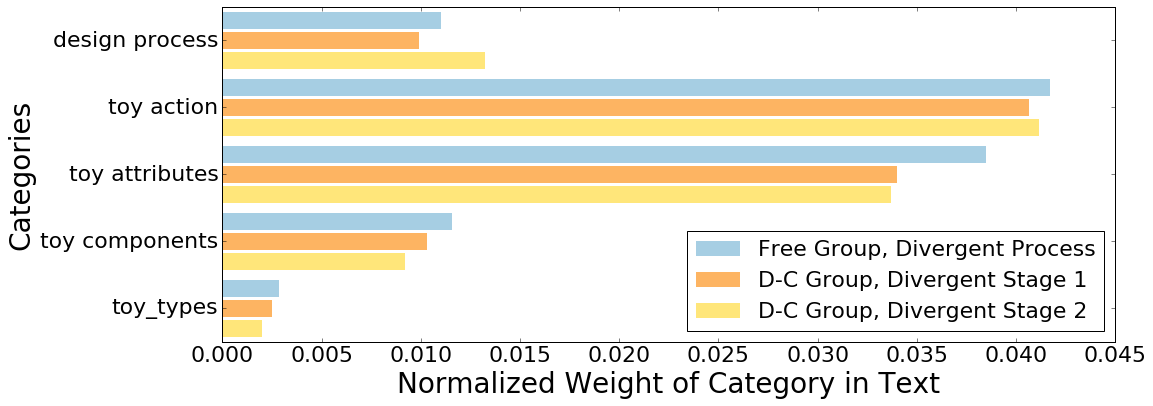

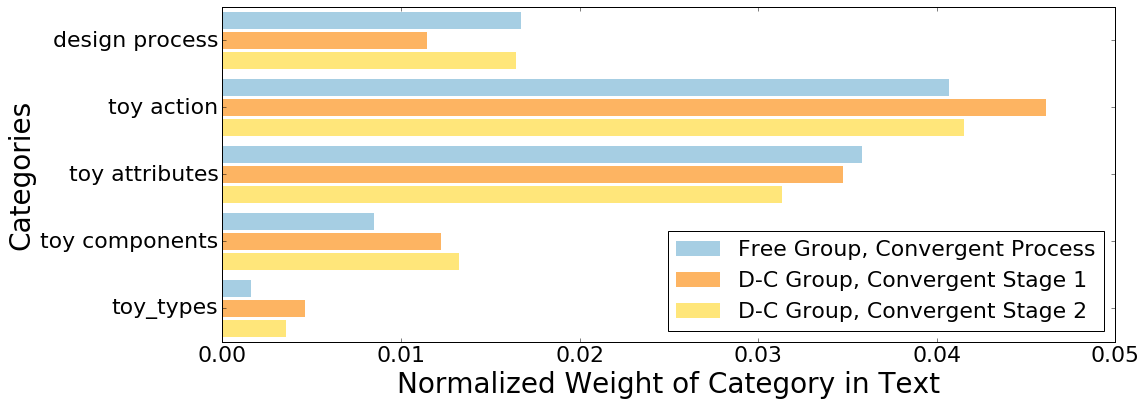

In [38]:
filesListDCDiv1 = openFiles(fileNamesDCDivergentStage1, textPathDC)
group2_raw_div1 = removeSpecials(filesListDCDiv1)
group2_div1 = removeObservations(group2_raw_div1)
group2_div1_categories = lexicon.analyze(group2_div1, categories = cats_to_show, normalize=True)

filesListDCDiv2 = openFiles(fileNamesDCDivergentStage2, textPathDC)
group2_raw_div2 = removeSpecials(filesListDCDiv2)
group2_div2 = removeObservations(group2_raw_div2)
group2_div2_categories = lexicon.analyze(group2_div2, categories = cats_to_show, normalize=True)

filesListDCConv1 = openFiles(fileNamesDCConvergentStage1, textPathDC)
group2_raw_conv1 = removeSpecials(filesListDCConv1)
group2_conv1 = removeObservations(group2_raw_conv1)
group2_conv1_categories = lexicon.analyze(group2_conv1, categories = cats_to_show, normalize=True)

filesListDCConv2 = openFiles(fileNamesDCConvergentStage2, textPathDC)
group2_raw_conv2 = removeSpecials(filesListDCConv2)
group2_conv2 = removeObservations(group2_raw_conv2)
group2_conv2_categories = lexicon.analyze(group2_conv2, categories = cats_to_show, normalize=True)

compare_cats_general([group1_div_categories, group2_div1_categories, group2_div2_categories], 
                     ["Free Group, Divergent Process", 
                      "D-C Group, Divergent Stage 1", 
                      "D-C Group, Divergent Stage 2"],
                     cats_to_show, "divergent_processes_stagewise", False)

compare_cats_general([group1_conv_categories, group2_conv1_categories, group2_conv2_categories], 
                     ["Free Group, Convergent Process", 
                      "D-C Group, Convergent Stage 1", 
                      "D-C Group, Convergent Stage 2"],
                     cats_to_show, "convergent_processes_stagewise", False)